<a href="https://colab.research.google.com/github/RajAakash/TransferLearning/blob/main/Tf_FineTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-09-08 13:04:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.207, 142.251.10.207, 142.251.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  23.1MB/s    in 7.7s    

2023-09-08 13:04:24 (20.8 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-09-24 00:38:29--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-09-24 00:38:29 (118 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

In [ ]:
unzip_data("10_food_classes_10_percent.zip")

In [ ]:
train_dir_10_percent="10_food_classes_10_percent/train"
test_dir_10_percent='10_food_classes_10_percent/test'

In [ ]:
import tensorflow as tf

In [ ]:
IMAGE_SIZE=(224,224)

In [ ]:
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                          label_mode='categorical',
                                                                          image_size=IMAGE_SIZE)
test_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(test_dir_10_percent,
                                                                         label_mode='categorical',
                                                                         image_size=IMAGE_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentation=Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    # preprocessing.RandomRescaling(1/255) for resnet only
],name='data_augmentation')

In [ ]:
from keras.layers import Embedding, GlobalAveragePooling2D, Dense
# Create a model
input_shape=(224,224,3);
model=tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
model.trainable=False
inputs=layers.Input(shape=input_shape,name='Input_layer')
x=data_augmentation(inputs)
x=model(x,training=False)
x=layers.GlobalAveragePooling2D(name='global_average_pooling_2D')(x)
outputs=layers.Dense(10,activation='softmax',name='output_layer')(x)
model=tf.keras.Model(inputs,outputs)

ModuleNotFoundError: ignored

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling_2D (  (None, 1280)             0         
 GlobalAveragePooling2D)                                         
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                             

In [ ]:
checkpoint_path="ten_percent_model_checkpoints_weights/checkpoint.ckpt"
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                       save_weights_only=True,
                                                       save_best_only=False,
                                                       save_freq="epoch",
                                                       verbose=1)

In [ ]:
initial_epochs=5
history=model.fit(train_data_10_percent,
                  epochs=initial_epochs,
                  validation_data=test_data_10_percent,
                  validation_steps=int(0.25*len(test_data_10_percent)),
                  callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                         experiment_name="10_percent_data_aug"),
                             checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20230908-130445
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9925 - accuracy: 0.3480
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 40s 1s/step - loss: 1.9925 - accuracy: 0.3480 - val_loss: 1.4930 - val_accuracy: 0.6431
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3909 - accuracy: 0.6453
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 19s 752ms/step - loss: 1.3909 - accuracy: 0.6453 - val_loss: 1.1022 - val_accuracy: 0.7352
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.1217 - accuracy: 0.7013
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 17s 682ms/step - loss: 1.1217 - accuracy: 0.7013 - val_loss: 0.8606 - val_accuracy: 0.7911
Epoc

In [ ]:
model.evaluate(test_data_10_percent)

79/79 [==============================] - 7s 76ms/step - loss: 0.6835 - accuracy: 0.8128


[0.683539867401123, 0.8127999901771545]

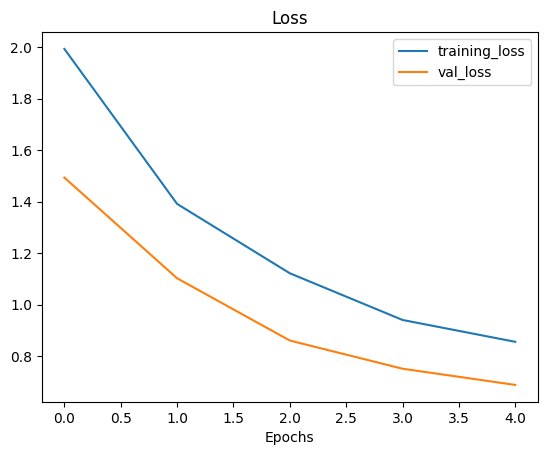

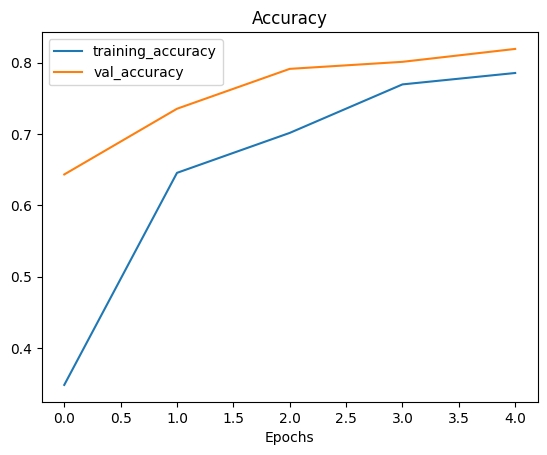

In [ ]:
plot_loss_curves(history)

In [ ]:
model.load_weights(checkpoint_path)

In [ ]:
model.evaluate(test_data_10_percent)

79/79 [==============================] - 7s 79ms/step - loss: 0.6835 - accuracy: 0.8128


[0.6835396885871887, 0.8127999901771545]

In [ ]:
model.layers

In [ ]:
for layer in model.layers:
  print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fb5916d4790> True
<keras.engine.sequential.Sequential object at 0x7fb5916d6350> True
<keras.engine.functional.Functional object at 0x7fb58b8f9510> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7fb58b84f250> True
<keras.layers.core.dense.Dense object at 0x7fb59176a2f0> True


In [ ]:
for i,layer in enumerate(model.layers[2].layers):
  print(i,layer.name,layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 Fals

In [ ]:
print(len(model.layers[2].trainable_variables))

0


In [ ]:
model.trainable = True

for layer in model.layers[:-10]:
  layer.trainable = False

model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [ ]:
fine_tune_epochs=initial_epochs+5
history_2=model.fit(train_data_10_percent,
                    epochs=fine_tune_epochs,
                    validation_data=test_data_10_percent,
                    validation_steps=int(0.25*len(test_data_10_percent)),
                    initial_epoch=history.epoch[-1],
                    callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                           experiment_name="10_Percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_Percent_fine_tune_last_10/20230908-132902
Epoch 5/10
24/24 [==============================] - 97s 2s/step - loss: 0.6335 - accuracy: 0.8053 - val_loss: 0.4322 - val_accuracy: 0.8651
Epoch 6/10
24/24 [==============================] - 42s 2s/step - loss: 0.4064 - accuracy: 0.8573 - val_loss: 0.4378 - val_accuracy: 0.8503
Epoch 7/10
24/24 [==============================] - 34s 1s/step - loss: 0.2682 - accuracy: 0.9213 - val_loss: 0.4284 - val_accuracy: 0.8602
Epoch 8/10
24/24 [==============================] - 36s 2s/step - loss: 0.1795 - accuracy: 0.9467 - val_loss: 0.4410 - val_accuracy: 0.8586
Epoch 9/10
24/24 [==============================] - 38s 2s/step - loss: 0.1206 - accuracy: 0.9613 - val_loss: 0.4299 - val_accuracy: 0.8569
Epoch 10/10
24/24 [==============================] - 37s 1s/step - loss: 0.0938 - accuracy: 0.9693 - val_loss: 0.4357 - val_accuracy: 0.8635


In [ ]:
results=model.evaluate(train_data_10_percent)

24/24 [==============================] - 2s 80ms/step - loss: 0.0668 - accuracy: 0.9840


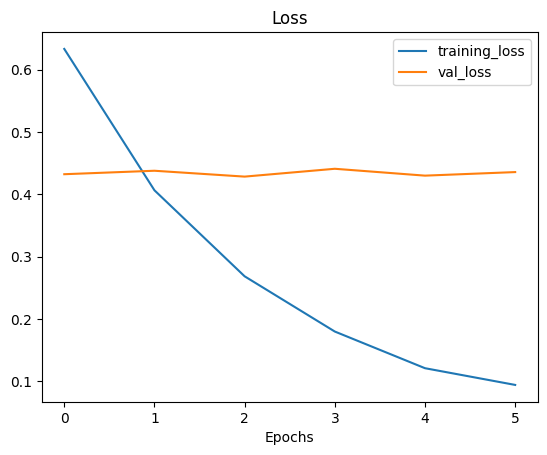

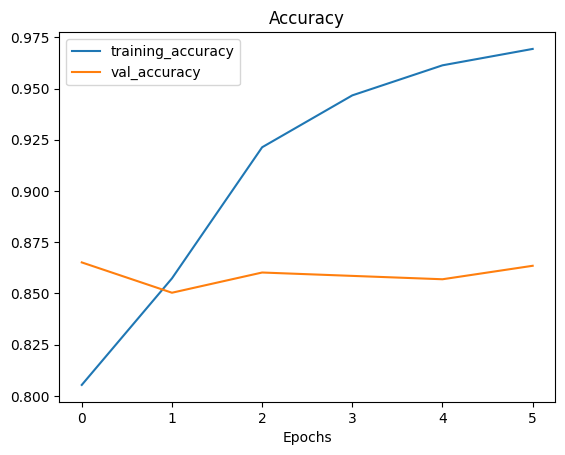

In [ ]:
plot_loss_curves(history_2)